# Are MMORPG's still a relevant game genre?

This was a widely popular opinion just a few years back -- that MMORPG's are a dead game genre.

First of all, what is an MMORPG? "MMORPG" is an abbreviation for "Massively Multiplayer Online Role Playing Game."
It is a term associated with games like with World of Warcaft, one of the the most popular MMORPG's at this time.

To answer this question, it needs to be determined which game or game genres are the most popular. I will be using some data extrapolated from Steam, which has games ranging from MMORPGs to fighting games, racing games, simulations, and even more.

The metric of measurement will be how well critics perceive the game to be and how many players the game has. Critic's scores will be measured by a value called a "Metacritic" score which takes all the scores a particular game receives from various critics and averages the scores out into one combined score. The games' playerbase will be determined using something called SteamSpy, a program that counts the amount of owners and players any given game has on Steam. There is some error involved with this program, as stated by its developers, but it will still give some good estimates and insight on how well a game is doing from the time of measurement


### So what do we want to find out from this data? 

Firstly, we will see if the Metacritic rating and playerbase have a correlation to one another, what effect these scores have on the game, and what can be inferred if these two measurements do or do not have any correlation.

Secondly, MMORPG's are supposed to stand the test of time, keeping their players interested in their game with new content and updates to their games. This means these games should have a higher player count in spite of an older date of release. So we will see if these games stand the test of time.

Thirdly, it is widely accepted that MMORPG's are no longer the games people look forward to. This data should lead us to which game type is the most popular among players.

In [449]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("games-features.csv")

First thing that needs to be done is only seeing the relevant information in the dataframe. So what we are going to need is the name of the game, the Metacritic score, and the genres of the games. The rest of the information can potentially be useful, but to simplify our analysis, we will only include the bare necessities. We are able to drop the last 20 columns or so to quickly shrink the amount of columns.

In [450]:
new_df = df.iloc[:,:-22]

In [451]:
new_df.iloc[0]

QueryID                                    10
ResponseID                                 10
QueryName                      Counter-Strike
ResponseName                   Counter-Strike
ReleaseDate                        Nov 1 2000
RequiredAge                                 0
DemoCount                                   0
DeveloperCount                              1
DLCCount                                    0
Metacritic                                 88
MovieCount                                  0
PackageCount                                1
RecommendationCount                     68991
PublisherCount                              1
ScreenshotCount                            13
SteamSpyOwners                       13033334
SteamSpyOwnersVariance                  92789
SteamSpyPlayersEstimate               9140731
SteamSpyPlayersVariance                 78136
AchievementCount                            0
AchievementHighlightedCount                 0
ControllerSupport                 

By singling out one of the games, we can see how many unnecessary columns are still listed, so we will drop the rest of these as well.

In [452]:
dropped_df = new_df.drop(columns=['QueryID',
                                  "ResponseID",
                                  "QueryName",
                                  "RequiredAge",
                                  "DemoCount",
                                  "DeveloperCount",
                                  "DLCCount",
                                  "MovieCount",
                                  "PackageCount",
                                  "PublisherCount",
                                  'ScreenshotCount',
                                  'AchievementCount',
                                  'AchievementHighlightedCount',
                                  'ControllerSupport',
                                  "IsFree",
                                  "FreeVerAvail",
                                  "PurchaseAvail",
                                "SubscriptionAvail",
                                "PlatformWindows",
                                "PlatformLinux",
                                  "PlatformMac",
                                "PCReqsHaveMin",
                                "PCReqsHaveRec",
                                "LinuxReqsHaveMin",
                                "LinuxReqsHaveRec",
                                "MacReqsHaveMin",
                                "MacReqsHaveRec",
                                "CategorySinglePlayer",
                                "CategoryMultiplayer",
                                "CategoryCoop",
                                "CategoryMMO",
                                "CategoryInAppPurchase",
                                "CategoryIncludeSrcSDK",
                                "CategoryIncludeLevelEditor",
                                "CategoryVRSupport",
                                "RecommendationCount",
                                "GenreIsNonGame",
                                  "SteamSpyOwners",
                                  "SteamSpyOwnersVariance",
                                  "SteamSpyPlayersVariance"
                             ])

In [453]:
dropped_df.sort_values(by="SteamSpyPlayersEstimate",ascending=False).head(20)

,ResponseName,ReleaseDate,Metacritic,SteamSpyPlayersEstimate,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
23,Dota 2,Jul 9 2013,90,90687580,False,True,False,False,True,False,False,False,True,False,False,False
20,Team Fortress 2,Oct 10 2007,92,37878812,False,True,False,False,False,False,False,False,True,False,False,False
27,Counter-Strike: Global Offensive,Aug 21 2012,83,25150372,False,True,False,False,False,False,False,False,False,False,False,False
4028,Unturned,Jul 7 2014,0,21438373,True,True,True,True,False,False,False,True,True,False,False,False
22,Left 4 Dead 2,Nov 16 2009,89,13583400,False,True,False,False,False,False,False,False,False,False,False,False
150,Garrys Mod,Nov 29 2006,0,11871328,True,False,False,False,False,False,True,False,False,False,False,False
11,Counter-Strike: Source,Nov 1 2004,88,11472993,False,True,False,False,False,False,False,False,False,False,False,False
1365,The Elder Scrolls V: Skyrim,Nov 10 2011,94,10903558,False,False,False,False,False,True,False,False,False,False,False,False
276,Sid Meiers Civilization(r) V,Sep 21 2010,90,9150595,False,False,False,False,True,False,False,False,False,False,False,False
0,Counter-Strike,Nov 1 2000,88,9140731,False,True,False,False,False,False,False,False,False,False,False,False


Now all we have is the name of the game, the release date, the Metacritic score, the amount of players, and the genre of the games. We will run into issues if the release dat eis still listed as an object, so we'll need to convert these values into integers. 

In [454]:
dropped_df["ReleaseDate"] = dropped_df["ReleaseDate"].str[-4:]
dropped_df = dropped_df[dropped_df["ReleaseDate"].str.isnumeric()]
dropped_df.reset_index(drop=True)

,ResponseName,ReleaseDate,Metacritic,SteamSpyPlayersEstimate,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
0,Counter-Strike,2000,88,9140731,False,True,False,False,False,False,False,False,False,False,False,False
1,Team Fortress Classic,1999,0,753627,False,True,False,False,False,False,False,False,False,False,False,False
2,Day of Defeat,2003,79,1709740,False,True,False,False,False,False,False,False,False,False,False,False
3,Deathmatch Classic,2001,0,789676,False,True,False,False,False,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999,0,705741,False,True,False,False,False,False,False,False,False,False,False,False
5,Ricochet,2000,0,843481,False,True,False,False,False,False,False,False,False,False,False,False
6,Half-Life,1998,96,2268772,False,True,False,False,False,False,False,False,False,False,False,False
7,Counter-Strike: Condition Zero,2004,65,4127910,False,True,False,False,False,False,False,False,False,False,False,False
8,Counter-Strike: Condition Zero,2004,65,4127910,False,True,False,False,False,False,False,False,False,False,False,False
9,Half-Life: Blue Shift,2001,71,662517,False,True,False,False,False,False,False,False,False,False,False,False


In [455]:
dropped_df["ReleaseDate"] = pd.to_numeric(dropped_df["ReleaseDate"])
dropped_df.head()

,ResponseName,ReleaseDate,Metacritic,SteamSpyPlayersEstimate,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
0,Counter-Strike,2000,88,9140731,False,True,False,False,False,False,False,False,False,False,False,False
1,Team Fortress Classic,1999,0,753627,False,True,False,False,False,False,False,False,False,False,False,False
2,Day of Defeat,2003,79,1709740,False,True,False,False,False,False,False,False,False,False,False,False
3,Deathmatch Classic,2001,0,789676,False,True,False,False,False,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999,0,705741,False,True,False,False,False,False,False,False,False,False,False,False


In [456]:
dropped_df.describe()

,ReleaseDate,Metacritic,SteamSpyPlayersEstimate
count,13096.000000,13096.000000,1.309600e+04
mean,2014.529093,12.466326,1.096300e+05
std,2.231520,27.674866,1.016048e+06
min,1997.000000,0.000000,0.000000e+00
25%,2014.000000,0.000000,5.380000e+02
50%,2015.000000,0.000000,4.304000e+03
75%,2016.000000,0.000000,2.887500e+04
max,2019.000000,96.000000,9.068758e+07


Now we have all the columns listed as values we are able to use in calculation. Still, there are a lot of values in our Metacritic column that come up as 0. This could be due to the game being relisted in the SteamAPI because of a re-release or new DLC (Downloadable Content) to be added to the game. By setting the Metacritic score to be higher than 0, we can remove a lot of these instances. These also occur in the estimated playerbase, so we will be removing those as well, along with some of the extremely high values of players that completely skew our data and make it unreadable. We will do this by considering any game with lower than 100,000 players and games with higher than 10,000,000 players to be outliers. These numbers seem to be outrageous, but the SteamSpy program has error associated with it, so we are using this as a broad analysis.

In [463]:
sample = dropped_df[dropped_df["Metacritic"]>0]
sample = sample[sample["SteamSpyPlayersEstimate"]>100000]
sample = sample[sample["SteamSpyPlayersEstimate"]<10000000]
sample.drop_duplicates(inplace=True)

sample = sample.reset_index(drop=True)

### Does the Metacritic score have any effect on the playerbase of the average game?

Now that our dataset is a bit more manageable and not too skewed by extreme outliers, we are able to extrapolate certain genres of games and plot them to see where their ratings and distributions lie. We will be extracting data only from the MMORPG genre and comparing it to other games, but this can be done with any game genre or combination of genres listed.

Generally, it can be assumed that MMORPG's with high ratings means they are able to keep players playing their games, so we expect to see at least some correlation with these plots.

In [464]:
rpg = sample[sample["GenreIsRPG"]==True]
mmorpg = rpg[rpg["GenreIsMassivelyMultiplayer"]==True]
mmorpg = mmorpg.reset_index(drop=True)

Here we will take just the MMORPG game genre and plot the distribution of the the Metacritic scores and the players of those games and see the trend it may or may not have.

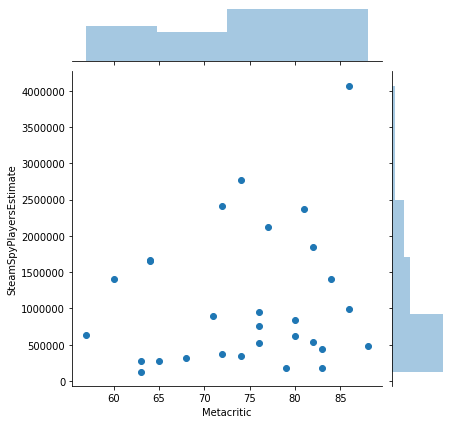

In [465]:
sns.jointplot(x="Metacritic",y="SteamSpyPlayersEstimate",data=mmorpg)

In [466]:
mmorpg["Metacritic"].describe()

count    29.000000
mean     74.689655
std       8.635903
min      57.000000
25%      68.000000
50%      76.000000
75%      82.000000
max      88.000000
Name: Metacritic, dtype: float64

In [467]:
mmorpg["SteamSpyPlayersEstimate"].describe()

count    2.900000e+01
mean     1.086908e+06
std      9.495758e+05
min      1.311050e+05
25%      3.746610e+05
50%      7.620560e+05
75%      1.658446e+06
max      4.071056e+06
Name: SteamSpyPlayersEstimate, dtype: float64

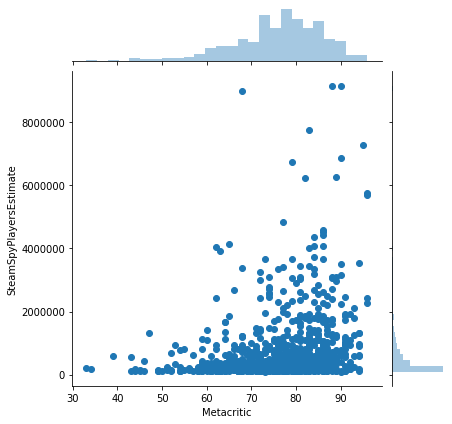

In [468]:
not_mmorpg = sample.drop(columns = ["GenreIsRPG",
                  "GenreIsMassivelyMultiplayer"])
sns.jointplot(x="Metacritic",y="SteamSpyPlayersEstimate",data=not_mmorpg)

In [469]:
sample["Metacritic"].mean()

76.26826722338204

In [470]:
mmorpg["Metacritic"].count()/dropped_df["Metacritic"].count()

0.0022144166157605375

Now we see that the estimated playerbase for both MMORPG's and non-MMORPG's are still skewed. Meaning there are a lot of games with very little players in them, despite high ratings. The video game market has been inundated with so many games in the recent years, so causes a lower playerbase in most games. Very few will reach a high amount of players and keep it consistent.  Also, the average Metacritic value of all games is around 75, so very rarely are games even rated at a lower score.

A very large portion of those games hovering around the 500k players mark. So perhaps the MMORPG genre isn't exactly a dead genre. Even though the amount of MMORPG's with a considerable playerbase is only 3% of the entire list, these games are maintaining the same trends as any other game in our data. We also learned that the Metacritic score and playerbase do not have much of a correlation whatsoever, with publishers generally giving every game that comes out a score of 70 or higher. What we can infer from that is the published score can draw people to purchase a game, but ultimately, players move on to other games. Games that can consistently keep a high playerbase are few and far between.

### How well can older games do against newer ones?

Now, we could use the date of release as another parameter to see what kind of games hold the higher playerbase even though the game is older. We will see what older games have a considerable amount of players despite their age.

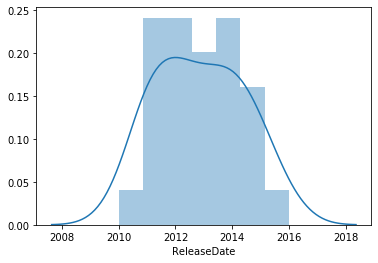

In [471]:
sns.distplot(mmorpg["ReleaseDate"],bins=7)

Here we are using 7 bins for the 7 years the data encompasses. Fairly large distribution of the games were release 3 or 4 year prior to the making of this data, so perhaps games need to create a following and gain traction for more players to join.

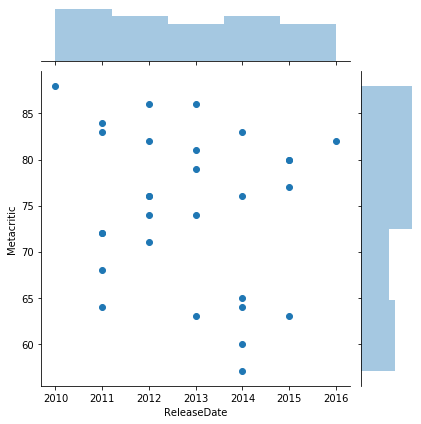

In [472]:
sns.jointplot(x="ReleaseDate",y="Metacritic",data=mmorpg)

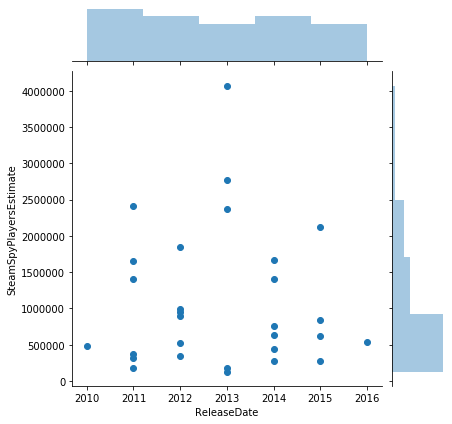

In [473]:
sns.jointplot(x="ReleaseDate",y="SteamSpyPlayersEstimate",data=mmorpg)

In [474]:
mmorpg.sort_values(by="SteamSpyPlayersEstimate",ascending=False).head()

,ResponseName,ReleaseDate,Metacritic,SteamSpyPlayersEstimate,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
21,Path of Exile,2013,86,4071056,True,True,True,False,False,True,False,False,True,False,False,True
8,Neverwinter,2013,74,2773641,False,True,True,False,False,True,False,False,True,False,False,True
3,DC Universe(tm) Online,2011,72,2414763,False,True,True,False,False,True,False,False,True,False,False,True
18,Marvel Heroes 2016,2013,81,2375844,False,True,False,False,False,True,False,False,True,False,False,True
25,TERA,2015,77,2119015,False,True,True,False,False,True,False,False,True,False,False,True


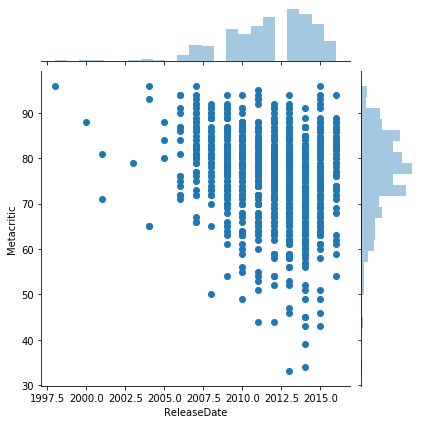

In [475]:
sns.jointplot(x="ReleaseDate",y="Metacritic",data=sample)

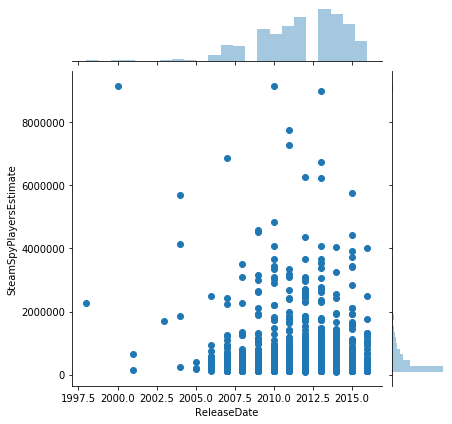

In [476]:
sns.jointplot(x="ReleaseDate", y="SteamSpyPlayersEstimate", data=sample,)

In [481]:
sample.sort_values(by="SteamSpyPlayersEstimate",ascending=False).head(20).reset_index(drop=True)

,ResponseName,ReleaseDate,Metacritic,SteamSpyPlayersEstimate,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
0,Sid Meiers Civilization(r) V,2010,90,9150595,False,False,False,False,True,False,False,False,False,False,False,False
1,Counter-Strike,2000,88,9140731,False,True,False,False,False,False,False,False,False,False,False,False
2,Warframe,2013,68,8970528,False,True,False,False,False,False,False,False,True,False,False,False
3,Terraria,2011,83,7764044,True,True,True,False,False,True,False,False,False,False,False,False
4,Portal 2,2011,95,7282849,False,True,True,False,False,False,False,False,False,False,False,False
5,Portal,2007,90,6864247,False,True,False,False,False,False,False,False,False,False,False,False
6,PAYDAY 2,2013,79,6745338,False,True,False,False,False,True,False,False,False,False,False,False
7,Borderlands 2,2012,89,6263964,False,True,False,False,False,True,False,False,False,False,False,False
8,War Thunder,2013,82,6213387,False,False,False,False,False,False,True,False,True,False,False,True
9,Grand Theft Auto V,2015,96,5756584,False,True,True,False,False,False,False,False,False,False,False,False


The most popular game from our list is  "Sid Meier's Civilization V," a game released almost 10 years ago from the time of this data collection. This was and is an extremely popular game of strategy that is still held in high regard. The highest MMORPG on this list is "Path of Exile," landing at rank 18 on this list, and the only MMORPG listed. It was released about 5 years ago, which is still impressive, considering how many games that were released in recent years that have an extremely low amount of players.

### So what is the most popular type of game out there?

The most popular type of game by far is the "Action" type game. And this genre of game, as seen by the game titles, are almost all games with FPS (first-person shooter) or TPS (third-person shooter) elements in them. This game type has been one of the most popular game types for a long time and most likely will stay there for a while. 

MMORPG's are still relevant it seems, but not nearly as popular as other game types out there. To delve further into this topic, an analysis could be done on certain game types and their lifespan. Seeing how well or poorly a game does at the beginning of its release, then following a timeline to see which games do well over a span of time.